In [2]:
import pandas as pd
from read_db.CH import Getch
import pandahouse
from datetime import date,timedelta, datetime
import telegram
import seaborn as sns
import matplotlib.pyplot as plt
import io
sns.set(style ='ticks')
import hashlib
from scipy import stats
import numpy as np
#import swifter
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df = Getch(
    '''
    select  toDate(time) as day
            ,countIf(post_id, action='like') as like
            ,countIf(post_id,action='view') as view
            ,like/view as ctr
    from simulator_20220520.feed_actions 
    group by day
    '''
    ).df

In [4]:
df.head(2)

,day,like,view,ctr
0,2022-03-28,1880,8208,0.229045
1,2022-03-29,13305,60906,0.218451


In [5]:
df_1 = df[['like','view']]

In [6]:
def autoNorm(dataset):
    x = dateset[:, 0:1]
    std = StandardScaler()
    x_std = std.fit_transform()
    print(x_std[2])
    print(np.average(x))
    print(np.std(x))
    print((x[2]-np.mean(x))/np.std(x))

In [7]:
if __name__ == '__main__':
    df_1 = df[['like','view']]
    autoNorm(df_1)

NameError: name 'dateset' is not defined

/nfs/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


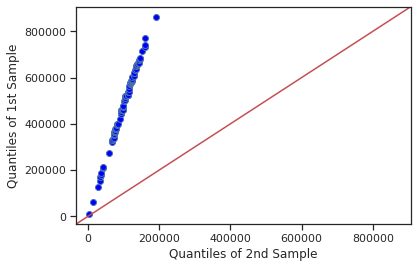

In [8]:
x = df.view
y = df.like
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y, line = '45')
plt.show()

In [9]:
df.likes.mean(), df.likes.median()

AttributeError: 'DataFrame' object has no attribute 'likes'

In [10]:
df.describe()

,like,view,ctr
count,79.000000,79.000000,79.000000
mean,101908.012658,487339.215190,0.208823
std,37077.091271,171811.137396,0.007900
min,1880.000000,8208.000000,0.192589
25%,77127.000000,378311.000000,0.202823
50%,107670.000000,522143.000000,0.208362
75%,124479.500000,598895.500000,0.214832
max,191945.000000,862685.000000,0.229045


In [9]:
df.groupby('post_id', as_index=False).agg({'views':'sum'}).sort_values('views', ascending = False)

,post_id,views
3052,3192,89909
3631,3795,77235
3104,3246,76393
1835,1930,75750
3909,4088,75064
...,...,...
132,141,2
1495,1576,2
11,14,1
49,52,1


In [26]:
df.groupby(['day'], as_index=False).agg({'likes':'sum'}).sort_values('likes', ascending = False).mean()

/tmp/ipykernel_218/568307328.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.groupby(['day'], as_index=False).agg({'likes':'sum'}).sort_values('likes', ascending = False).mean()


likes    94965.338462
dtype: float64

In [27]:
df.groupby(['day'], as_index=False).agg({'likes':'sum'}).sort_values('likes', ascending = False).median()

/tmp/ipykernel_218/4148226244.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.groupby(['day'], as_index=False).agg({'likes':'sum'}).sort_values('likes', ascending = False).median()


likes    102580.0
dtype: float64

In [20]:
df = Getch(
    '''
    select post_id
            ,sum(action='like') as likes
            ,sum(action='view') as views
            ,likes/views as ctr
    from simulator_20220520.feed_actions 
    group by post_id
    '''
    ).df

In [21]:
df.describe()

,post_id,likes,views,ctr
count,5452.000000,5452.000000,5452.000000,5452.000000
mean,2849.337491,1476.741379,7062.021277,0.134761
std,1638.015859,2874.021288,11083.767720,0.059292
min,1.000000,0.000000,1.000000,0.000000
25%,1430.750000,46.000000,511.000000,0.093238
50%,2849.500000,303.500000,2464.000000,0.125000
75%,4272.250000,1457.500000,8648.250000,0.173985
max,5718.000000,31714.000000,104338.000000,0.375000


In [22]:
from statsmodels.datasets import co2
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
data = co2.load(True).data
data = data.resample('M').mean().ffill()

In [23]:
data

,co2
1958-03-31,316.100000
1958-04-30,317.200000
1958-05-31,317.433333
1958-06-30,317.433333
1958-07-31,315.625000
...,...
2001-08-31,369.425000
2001-09-30,367.880000
2001-10-31,368.050000
2001-11-30,369.375000


In [24]:
from statsmodels.tsa.seasonal import STL
res = STL(df).fit()
res.plot()
plt.show()

ValueError: y must be a 1d array

In [ ]:
from statsmodels.tsa.seasonal import STL
res = STL(data).fit()
res.plot()
plt.show()

In [25]:
df_post = Getch(
    '''
    select post_id,begin_post,finish_post
            ,datediff('day',begin_post, finish_post) as day_life
            ,sum(action='like') as likes
            ,sum(action='view') as views
            ,likes/views as ctr
    from (
    select *
    , min(time) over (partition by post_id) as begin_post
    , max(time) over (partition by post_id) as finish_post
    from simulator_20220520.feed_actions)
    group by post_id,begin_post,finish_post
    '''
    ).df

In [26]:
df_post

,post_id,begin_post,finish_post,day_life,likes,views,ctr
0,2594,2022-05-01 23:05:14,2022-05-03 17:59:02,2,692,4863,0.142299
1,2354,2022-04-28 18:29:57,2022-04-30 08:01:07,2,540,3873,0.139427
2,1105,2022-04-11 20:00:05,2022-04-12 03:48:06,1,13,138,0.094203
3,1118,2022-04-11 19:00:03,2022-04-13 03:25:46,2,256,1914,0.133751
4,5397,2022-06-10 18:08:42,2022-06-13 01:52:36,3,1617,10043,0.161008
...,...,...,...,...,...,...,...
5448,2098,2022-04-24 17:34:42,2022-04-26 09:58:30,2,545,3913,0.139279
5449,4519,2022-05-28 19:00:10,2022-05-29 03:49:41,1,39,491,0.079430
5450,4661,2022-05-31 17:49:27,2022-06-01 19:57:21,1,295,2821,0.104573
5451,3799,2022-05-18 18:26:06,2022-05-18 23:57:46,0,21,312,0.067308


<AxesSubplot:xlabel='ctr', ylabel='Count'>

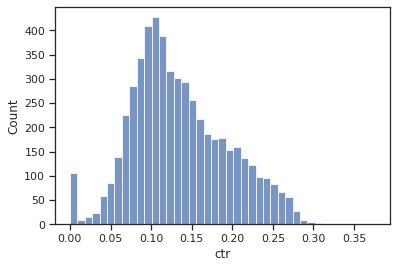

In [27]:
sns.histplot(data =df_post,x='ctr')

<AxesSubplot:xlabel='day_life', ylabel='Count'>

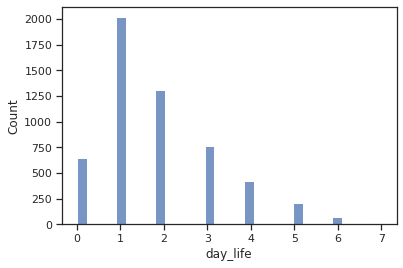

In [28]:
sns.histplot(data =df_post,x='day_life')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


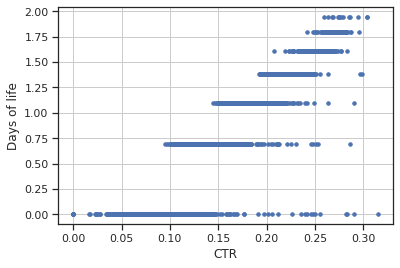

In [29]:
'''Визуализация корреляции'''
df = df_post
xs = df_post['ctr']
ys = df_post['day_life'].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('CTR')
plt.ylabel('Days of life')
plt.show()

In [30]:
df_post['ctr'].corr(df_post['day_life'])

0.8893650369196782

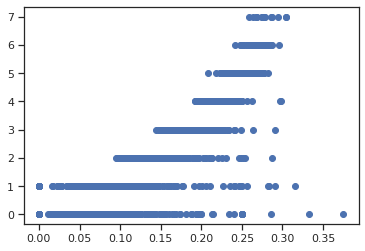

In [31]:
plt.scatter('ctr', 'day_life', data=df_post)

In [32]:
df = Getch(
    '''
    select  toDate(time) as day
            ,countIf(post_id, action='like') as like
            ,countIf(post_id,action='view') as view
            ,like/view as ctr
    from simulator_20220520.feed_actions 
    group by day
    '''
    ).df

In [3]:
post = Getch(
    '''
with t1 as (
select user_id, min(toDate(time)) as date
from simulator_20220520.feed_actions
group by user_id

), t2 as (
select distinct toDate(time) as date
from simulator_20220520.feed_actions

), t3 as (
select *
,dateadd(minute,10,begin_post) as datetimelike
,if(time <= datetimelike,1,0) as speedlike
from
(select user_id, post_id, action, time
, min(time) over (partition by post_id) as begin_post
, max(time) over (partition by post_id) as finish_post
from simulator_20220520.feed_actions)
)


select ad.*
      ,dd.number_users
      ,reach/dd.number_users as percentage_reach
      ,toHour(begin_post) as hour_begin_post
      ,if (likes > 0, 'with likes', 'no likes') as type_post
from
(select post_id,begin_post,finish_post
        ,datediff('hour',begin_post, finish_post) as day_life
        ,sum(action='like') as likes
        ,sum(action='view') as views
        ,likes/views as ctr
        ,count(distinct user_id) as reach
        ,sum(speedlike) as speedlike
from t3
group by post_id,begin_post,finish_post

) ad

left join 
(select date, max(cnt) as number_users
from (select t2.date
          ,count(t1.user_id) over(order by t2.date) cnt
      from t2 left join t1 on t1.date=t2.date) t
group by date) dd

on dd.date = toDate(ad.begin_post)
    
    '''
    ).df

In [9]:
post.groupby('views').agg({'post_id':'count'})

,post_id
views,
1,4
2,10
3,8
4,12
5,3
...,...
76504,1
77235,1
89909,1


(array([3.38e+03, 6.02e+02, 3.40e+02, 2.09e+02, 1.67e+02, 1.29e+02,
        1.05e+02, 8.60e+01, 5.60e+01, 5.50e+01, 4.60e+01, 3.50e+01,
        2.70e+01, 2.50e+01, 2.00e+01, 2.80e+01, 2.60e+01, 1.50e+01,
        1.80e+01, 1.70e+01, 1.00e+01, 1.50e+01, 9.00e+00, 5.00e+00,
        7.00e+00, 4.00e+00, 5.00e+00, 1.00e+00, 3.00e+00, 5.00e+00,
        4.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 3.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([    0.  ,   634.28,  1268.56,  1902.84,  2537.12,  3171.4 ,
         3805.68,  4439.96,  5074.24,  5708.52,  6342.8 ,  6977.08,
         7611.36,  8245.64,  8879.92,  9514.2 , 10148.48, 10782.76,
        11417.04, 12051.32, 12685.6 , 13319.88, 13954.16, 14588.44,
        15222.72, 15857.  , 16491.28, 17125.56, 17759.84, 18394.12,
        19028.4 , 19662.68, 20296.96, 20931.24, 21565.52, 22199.8 ,
        22834.08, 

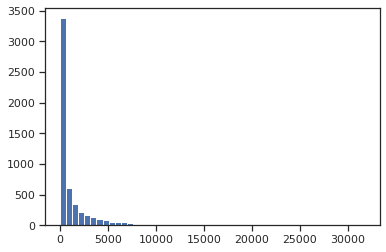

In [5]:
plt.hist(post.likes,bins =50)

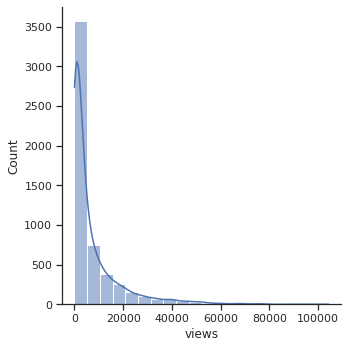

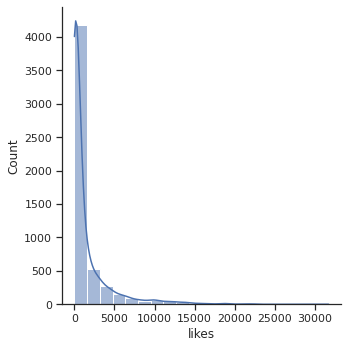

In [6]:
sns.displot(post.views,bins=20, kde =True)
sns.displot(post.likes,bins=20, kde =True)

(array([107.,  17.,  36.,  85., 156., 312., 422., 528., 593., 469., 413.,
        395., 313., 264., 229., 222., 218., 176., 146., 120., 108.,  82.,
         30.,   7.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([0.    , 0.0125, 0.025 , 0.0375, 0.05  , 0.0625, 0.075 , 0.0875,
        0.1   , 0.1125, 0.125 , 0.1375, 0.15  , 0.1625, 0.175 , 0.1875,
        0.2   , 0.2125, 0.225 , 0.2375, 0.25  , 0.2625, 0.275 , 0.2875,
        0.3   , 0.3125, 0.325 , 0.3375, 0.35  , 0.3625, 0.375 ]),
 <BarContainer object of 30 artists>)

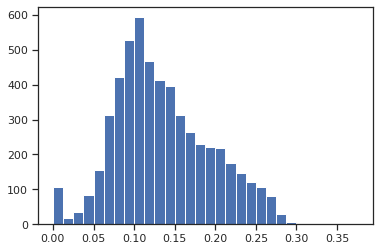

In [55]:
plt.hist(post.ctr,bins =30)

(array([1637., 1302.,  916.,  582.,  448.,  282.,  141.,  101.,   33.,
          11.]),
 array([  0.,  17.,  34.,  51.,  68.,  85., 102., 119., 136., 153., 170.]),
 <BarContainer object of 10 artists>)

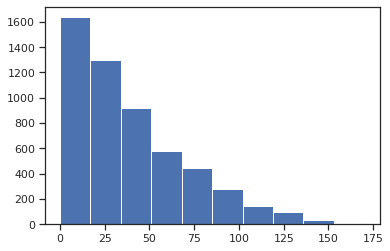

In [56]:
plt.hist(post['day_life'])

In [57]:
 np.corrcoef(post.ctr, post['day_life'])

array([[1.       , 0.9214182],
       [0.9214182, 1.       ]])

In [58]:
 np.corrcoef(post.likes, post['day_life'])

array([[1.        , 0.82680687],
       [0.82680687, 1.        ]])

In [59]:
 np.corrcoef(post.views, post['day_life'])

array([[1.        , 0.87092256],
       [0.87092256, 1.        ]])

<AxesSubplot:xlabel='day_life', ylabel='likes'>

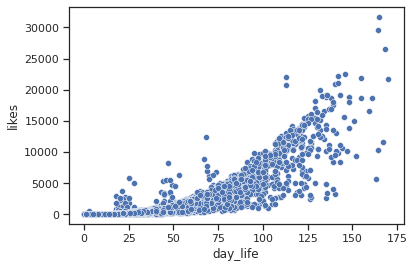

In [60]:
sns.scatterplot(data = post, x ='day_life',y = 'likes')

In [61]:
post['day_life_log'] =np.log(post[['day_life']])

In [62]:
post[['day_life','likes','views','ctr']].corr()

,day_life,likes,views,ctr
day_life,1.000000,0.826807,0.870923,0.921418
likes,0.826807,1.000000,0.990445,0.750431
views,0.870923,0.990445,1.000000,0.799782
ctr,0.921418,0.750431,0.799782,1.000000


In [63]:
post.sort_values('views', ascending =False)

,post_id,begin_post,finish_post,day_life,likes,views,ctr,reach,speedlike,number_users,percentage_reach,hour_begin_post,type_post,day_life_log
1001,4866,2022-06-03 16:33:24,2022-06-10 13:59:50,165,31714,104338,0.303954,55331,401,131331,0.421310,16,with likes,5.105945
2124,5127,2022-06-07 17:18:44,2022-06-14 13:54:49,164,29637,97417,0.304228,53550,406,135159,0.396200,17,with likes,5.099866
1245,3192,2022-05-08 19:28:44,2022-05-15 19:57:50,168,26507,89909,0.294820,44756,373,83971,0.532994,19,with likes,5.123964
5399,3795,2022-05-18 13:03:23,2022-05-24 11:59:32,142,22224,77235,0.287745,42815,277,104208,0.410861,13,with likes,4.955827
4459,5165,2022-06-07 15:58:16,2022-06-13 17:59:19,146,22596,76504,0.295357,45577,317,135159,0.337210,15,with likes,4.983607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,30,2022-03-28 22:31:07,2022-03-29 00:05:24,2,0,2,0.000000,2,1,1198,0.001669,22,no likes,0.693147
5163,5002,2022-06-05 19:47:40,2022-06-05 19:47:40,0,0,1,0.000000,1,1,132972,0.000008,19,no likes,-inf
3101,219,2022-03-30 21:41:22,2022-03-30 21:41:22,0,0,1,0.000000,1,1,5055,0.000198,21,no likes,-inf
4453,14,2022-03-28 20:43:50,2022-03-28 20:43:50,0,0,1,0.000000,1,1,1198,0.000835,20,no likes,-inf


In [64]:
post.describe()

,post_id,day_life,likes,views,ctr,reach,speedlike,number_users,percentage_reach,hour_begin_post,day_life_log
count,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000
mean,2849.854575,38.634696,1476.580781,7061.278929,0.134725,5401.603521,58.529800,75196.121034,0.112923,18.231065,-inf
std,1638.310662,32.162470,2873.940847,11083.526522,0.059265,7372.542763,56.566627,43930.429227,0.238671,4.546428,NaN
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1198.000000,0.000008,0.000000,-inf
25%,1431.000000,13.000000,46.000000,511.000000,0.093284,503.000000,18.000000,37142.000000,0.008772,17.000000,2.564949
50%,2850.000000,30.000000,303.000000,2462.000000,0.125000,2299.000000,40.000000,73730.000000,0.040264,19.000000,3.401197
75%,4273.000000,57.000000,1457.000000,8648.000000,0.173977,7267.000000,82.000000,117640.000000,0.133315,21.000000,4.043051
max,5718.000000,170.000000,31714.000000,104338.000000,0.375000,55331.000000,406.000000,142041.000000,5.521703,23.000000,5.135798


In [65]:
post.likes.median()

303.0

/nfs/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


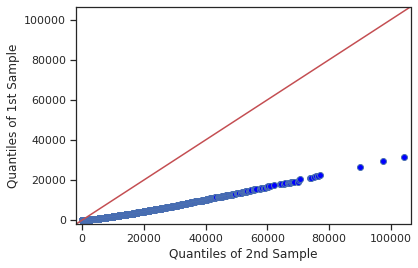

In [66]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
x = post.likes
y = post.views
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y,line="45")
plt.show()

In [67]:
y = (x - min) / (max - min)

TypeError: unsupported operand type(s) for -: 'int' and 'builtin_function_or_method'

In [68]:
view_max = post.views.max()
view_min = post.views.min()

like_max = post.likes.max()
like_min = post.likes.min()

In [69]:
post['views_n'] = post.views.apply(lambda x: (x - view_min)/(view_max - view_min))
post['likes_n'] = post.likes.apply(lambda x: (x - like_min)/(like_max - like_min))

/nfs/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


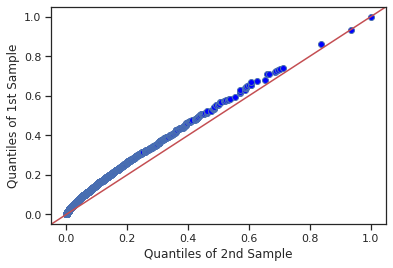

In [70]:
x = post['views_n']
y =post['likes_n']
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y,line="45")
plt.show()

(array([3.058e+03, 8.030e+02, 4.490e+02, 2.670e+02, 2.060e+02, 1.580e+02,
        1.040e+02, 8.000e+01, 6.500e+01, 5.400e+01, 3.500e+01, 4.500e+01,
        2.500e+01, 2.800e+01, 2.000e+01, 1.600e+01, 8.000e+00, 8.000e+00,
        4.000e+00, 7.000e+00, 3.000e+00, 6.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

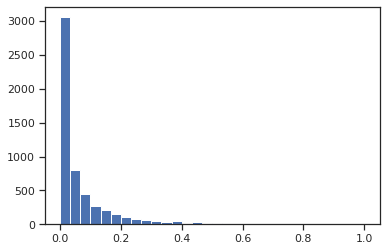

In [73]:
plt.hist(post['views_n'],bins =30)

(array([3.811e+03, 5.700e+02, 3.060e+02, 2.030e+02, 1.350e+02, 9.100e+01,
        7.100e+01, 4.800e+01, 3.400e+01, 4.800e+01, 3.100e+01, 2.600e+01,
        2.200e+01, 1.400e+01, 9.000e+00, 8.000e+00, 2.000e+00, 8.000e+00,
        5.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

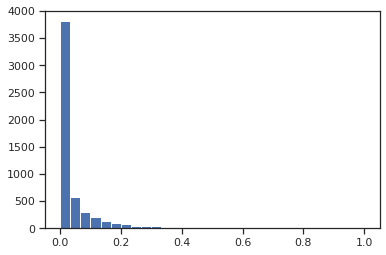

In [72]:
plt.hist(post['likes_n'],bins =30)